[Вот отсюда](https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#linear-model-optimization)

In [6]:
import pygad
import numpy

Given the following function:

    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44

What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.

In [7]:
function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

In [8]:
num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

[Как оно будет работать](https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#life-cycle-of-pygad)

In [9]:
# Running the GA to optimize the parameters of the function.
ga_instance.run()

Generation = 1
Fitness    = 1.1696173400223389
Change     = 1.1696173400223389
Generation = 2
Fitness    = 5.929319962502757
Change     = 4.759702622480418
Generation = 3
Fitness    = 11.641150878522177
Change     = 5.71183091601942
Generation = 4
Fitness    = 11.641150878522177
Change     = 0.0
Generation = 5
Fitness    = 95.02877605103313
Change     = 83.38762517251095
Generation = 6
Fitness    = 95.02877605103313
Change     = 0.0
Generation = 7
Fitness    = 95.02877605103313
Change     = 0.0
Generation = 8
Fitness    = 95.02877605103313
Change     = 0.0
Generation = 9
Fitness    = 95.02877605103313
Change     = 0.0
Generation = 10
Fitness    = 95.02877605103313
Change     = 0.0
Generation = 11
Fitness    = 95.02877605103313
Change     = 0.0
Generation = 12
Fitness    = 95.02877605103313
Change     = 0.0
Generation = 13
Fitness    = 95.02877605103313
Change     = 0.0
Generation = 14
Fitness    = 95.02877605103313
Change     = 0.0
Generation = 15
Fitness    = 95.02877605103313
Change 

Parameters of the best solution : [-0.41793987  2.30106242  2.29610732  0.75125145 -1.8440921  -3.87211569]
Fitness value of the best solution = 369.50233342882154
Index of the best solution : 0
Predicted output based on the best solution : 44.00270534285505
Best fitness value reached after 43 generations.


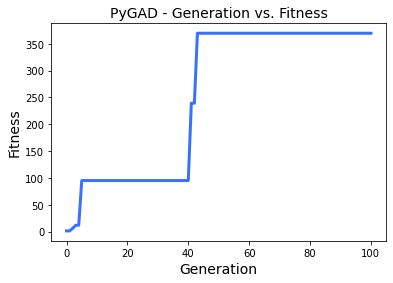

''

In [12]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()
;